In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade tensorflow

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 397, in resolve
    self._add_to_criteria(self.state.criteria, r, parent

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Dataset Parameters (Adjust to your directory structure)
data_dir = '/content/drive/MyDrive/SorghumWeedTnV/TrainNVaditate'
batch_size = 32
image_size = (224, 224)

# Data Preparation with Augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.1,
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)

# Model Building
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=image_size + (3,))
base_model.trainable = False  # Optionally freeze more layers for fine-tuning

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Regularization
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compilation with user-defined learning rate
learning_rate = 0.0001  # Default learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

# Training with Callbacks
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=2)
]

history = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=callbacks)

# Evaluation (Get a new test_ds for true performance estimate)
test_data_dir = '/content/drive/MyDrive/SorghumWeedTnV/Test'  # Provide your test data directory

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

loss, accuracy = model.evaluate(test_generator)
print('Test Accuracy:', accuracy)


Found 3494 images belonging to 3 classes.
Found 387 images belonging to 3 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/50
110/110 [==============================] - 1164s 10s/step - loss: 0.7875 - accuracy: 0.6637 - val_loss: 0.5572 - val_accuracy: 0.8243 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 20s 178ms/step - loss: 0.4061 - accuracy: 0.8912 - val_loss: 0.4094 - val_accuracy: 0.8475 - lr: 1.0000e-04
Epoch 3/50
110/110 [==============================] - 19s 170ms/step - loss: 0.2912 - accuracy: 0.9236 - val_loss: 0.3482 - val_accuracy: 0.8734 - lr: 1.0000e-04
Epoch 4/50
110/110 [==============================] - 19s 167ms/step - loss: 0.2353 - accuracy: 0.9356 - val_loss: 0.3140 - val_accuracy: 0.8837 - lr: 1.0000e-04
Epoch 5/50
110/110 [==============================] - 19s 174ms/step - loss: 0.2026 - accuracy: 0.9408 - val_loss: 0.2963 - val_accuracy: 0.8915 - lr: 1.0000e-04
Epoch 6/50
110/110 [======================

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

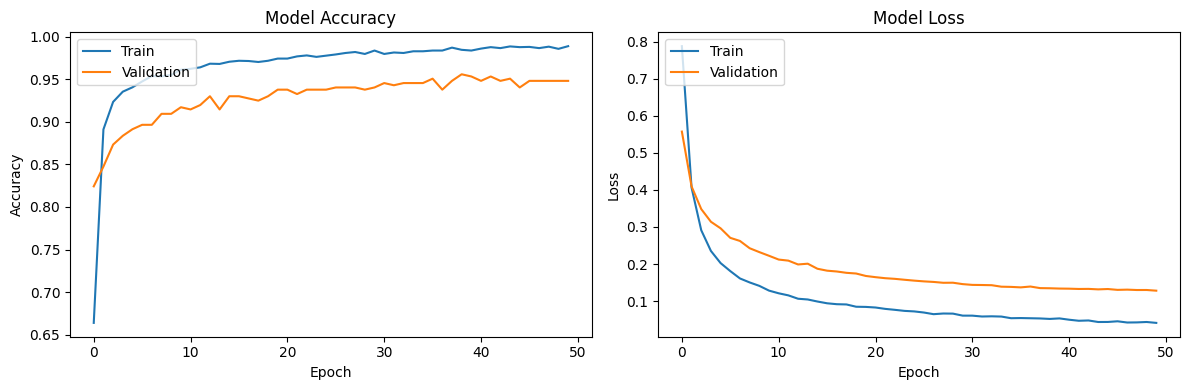

In [ ]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Extracting data from history object
history_data = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Loss': history.history['loss'],
    'Accuracy': history.history['accuracy'],
    'Val_Loss': history.history['val_loss'],
    'Val_Accuracy': history.history['val_accuracy']
}

# Create a DataFrame
df = pd.DataFrame(history_data)

# Save the DataFrame to an Excel file
df.to_excel('training_results.xlsx', index=False)
df

,Epoch,Loss,Accuracy,Val_Loss,Val_Accuracy
0,1,0.787521,0.663709,0.557156,0.824289
1,2,0.406115,0.891242,0.409436,0.847545
2,3,0.291231,0.923583,0.348240,0.873385
3,4,0.235314,0.935604,0.314005,0.883721
4,5,0.202554,0.940756,0.296344,0.891473
5,6,0.180991,0.947625,0.270641,0.896641
6,7,0.161151,0.953921,0.262252,0.896641
7,8,0.150404,0.953635,0.242659,0.909561
8,9,0.141145,0.955352,0.232176,0.909561
9,10,0.128352,0.961362,0.222289,0.917313


14/14 [==============================] - 3s 138ms/step


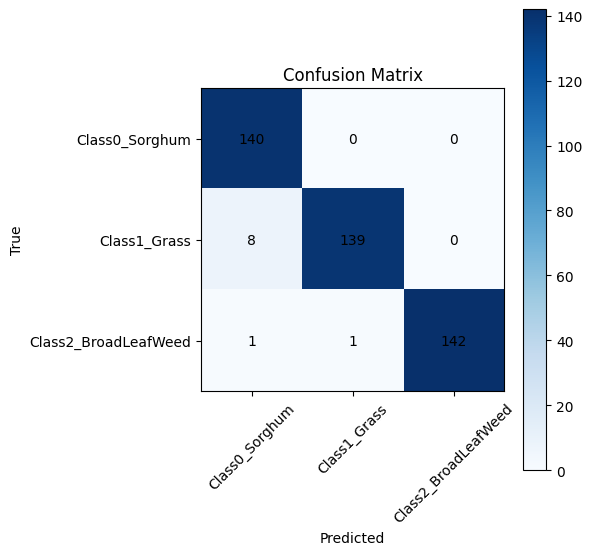

Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.94      1.00      0.97       140
        Class1_Grass       0.99      0.95      0.97       147
Class2_BroadLeafWeed       1.00      0.99      0.99       144

            accuracy                           0.98       431
           macro avg       0.98      0.98      0.98       431
        weighted avg       0.98      0.98      0.98       431



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Convert labels to classes
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_labels = test_generator.classes

# Plot confusion matrix
conf_mat = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# Iterate through each class and print values
for true_class in range(len(class_labels)):
    for pred_class in range(len(class_labels)):
        value = conf_mat[true_class, pred_class]
        plt.text(pred_class, true_class, f'{value}', ha='center', va='center')

plt.tight_layout()
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, y_pred, target_names=class_labels))


14/14 [==============================] - 4s 283ms/step


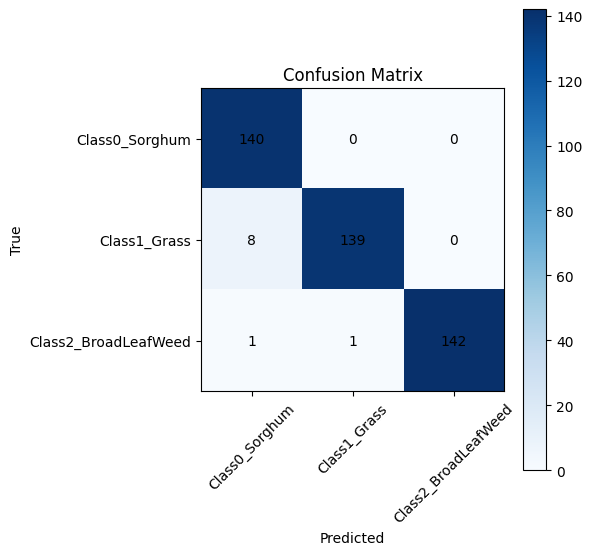

Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.94      1.00      0.97       140
        Class1_Grass       0.99      0.95      0.97       147
Class2_BroadLeafWeed       1.00      0.99      0.99       144

            accuracy                           0.98       431
           macro avg       0.98      0.98      0.98       431
        weighted avg       0.98      0.98      0.98       431



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Convert labels to classes
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_labels = test_generator.classes

# Plot confusion matrix
conf_mat = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# Iterate through each class and print values
for true_class in range(len(class_labels)):
    for pred_class in range(len(class_labels)):
        value = conf_mat[true_class, pred_class]
        plt.text(pred_class, true_class, f'{value}', ha='center', va='center')

plt.tight_layout()
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, y_pred, target_names=class_labels))


13/13 [==============================] - 2s 131ms/step


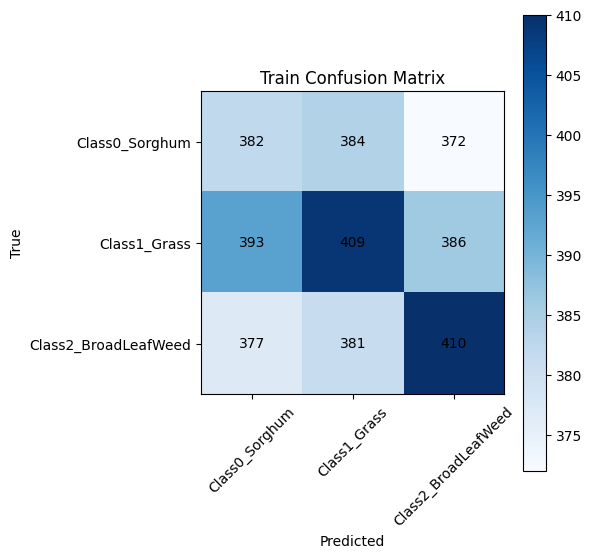

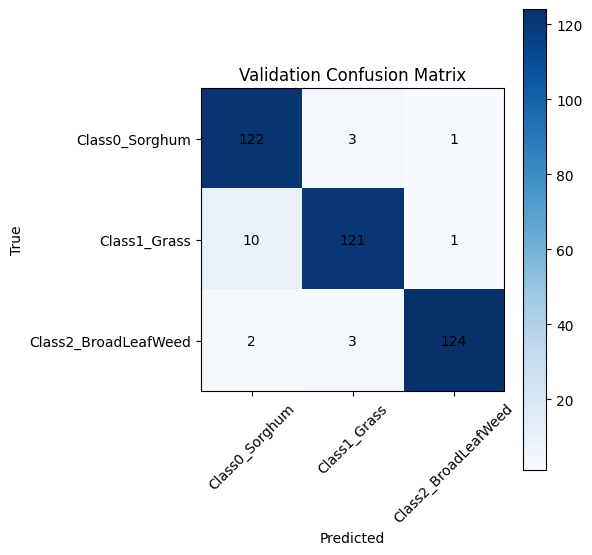

Train Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.33      0.34      0.33      1138
        Class1_Grass       0.35      0.34      0.35      1188
Class2_BroadLeafWeed       0.35      0.35      0.35      1168

            accuracy                           0.34      3494
           macro avg       0.34      0.34      0.34      3494
        weighted avg       0.34      0.34      0.34      3494

Validation Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.91      0.97      0.94       126
        Class1_Grass       0.95      0.92      0.93       132
Class2_BroadLeafWeed       0.98      0.96      0.97       129

            accuracy                           0.95       387
           macro avg       0.95      0.95      0.95       387
        weighted avg       0.95      0.95      0.95       387



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(conf_mat, class_labels, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Iterate through each class and print values
    for true_class in range(len(class_labels)):
        for pred_class in range(len(class_labels)):
            value = conf_mat[true_class, pred_class]
            plt.text(pred_class, true_class, f'{value}', ha='center', va='center')

    plt.tight_layout()
    plt.show()

# Predict classes for the train and validation sets separately
Y_train_pred = model.predict(train_generator)
y_train_pred = np.argmax(Y_train_pred, axis=1)

Y_val_pred = model.predict(val_generator)
y_val_pred = np.argmax(Y_val_pred, axis=1)

# Convert labels to classes for train and validation sets
train_class_labels = list(train_generator.class_indices.keys())
val_class_labels = list(val_generator.class_indices.keys())

# Get true labels for train and validation sets
true_train_labels = train_generator.classes
true_val_labels = val_generator.classes

# Calculate confusion matrices for train and validation sets
train_conf_mat = confusion_matrix(true_train_labels, y_train_pred)
val_conf_mat = confusion_matrix(true_val_labels, y_val_pred)

# Plot confusion matrices for train and validation sets
plot_confusion_matrix(train_conf_mat, train_class_labels, title='Train Confusion Matrix')
plot_confusion_matrix(val_conf_mat, val_class_labels, title='Validation Confusion Matrix')

# Display classification report for train and validation sets
print("Train Classification Report:\n", classification_report(true_train_labels, y_train_pred, target_names=train_class_labels))
print("Validation Classification Report:\n", classification_report(true_val_labels, y_val_pred, target_names=val_class_labels))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

# Dataset Parameters (Adjust to your directory structure)
data_dir = '/content/drive/MyDrive/SorghumWeedTnV/TrainNVaditate'
batch_size = 32
image_size = (224, 224)

# Data Preparation with Augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.1,
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
)

# Model Building
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=image_size + (3,))
base_model.trainable = False  # Optionally freeze more layers for fine-tuning

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # Regularization
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compilation with user-defined learning rate
learning_rate = 0.0001  # Default learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

# Training with Callbacks
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=2)
]

history = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=callbacks)

# Evaluation (Get a new test_ds for true performance estimate)
test_data_dir = '/content/drive/MyDrive/SorghumWeedTnV/Test'  # Provide your test data directory

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

loss, accuracy = model.evaluate(test_generator)
print('Test Accuracy:', accuracy)


Found 3494 images belonging to 3 classes.
Found 387 images belonging to 3 classes.
87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/50
110/110 [==============================] - 815s 7s/step - loss: 0.8470 - accuracy: 0.6139 - val_loss: 0.5969 - val_accuracy: 0.7881 - lr: 1.0000e-04
Epoch 2/50
110/110 [==============================] - 24s 219ms/step - loss: 0.4359 - accuracy: 0.8678 - val_loss: 0.4404 - val_accuracy: 0.8424 - lr: 1.0000e-04
Epoch 3/50
110/110 [==============================] - 17s 156ms/step - loss: 0.3033 - accuracy: 0.9167 - val_loss: 0.3751 - val_accuracy: 0.8553 - lr: 1.0000e-04
Epoch 4/50
110/110 [==============================] - 18s 159ms/step - loss: 0.2417 - accuracy: 0.9362 - val_loss: 0.3319 - val_accuracy: 0.8630 - lr: 1.0000e-04
Epoch 5/50
110/110 [==============================] - 18s 160ms/step - loss: 0.2082 - accuracy: 0.9419 - val_loss: 0.2977 - val_accuracy: 0.8811 - lr: 1.0000e-04
Epoch 6/50
110/110 [========================

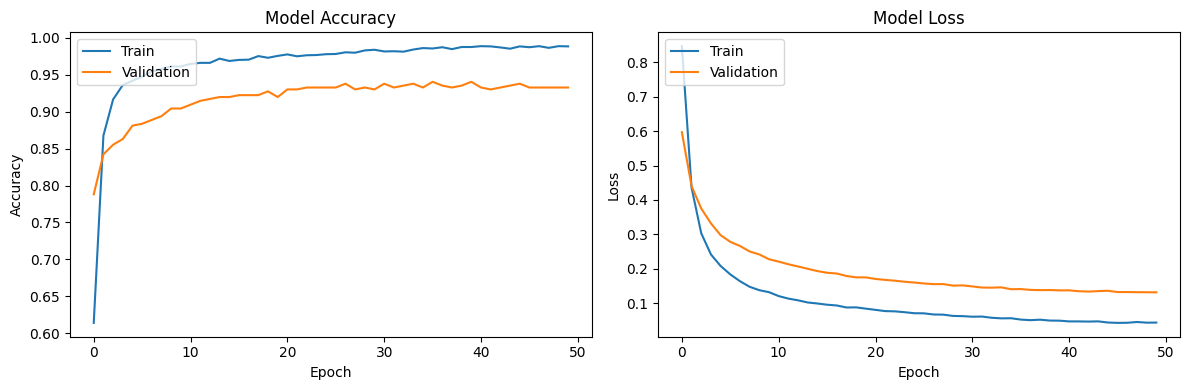

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Extracting data from history object
history_data = {
    'Epoch': list(range(1, len(history.history['loss']) + 1)),
    'Loss': history.history['loss'],
    'Accuracy': history.history['accuracy'],
    'Val_Loss': history.history['val_loss'],
    'Val_Accuracy': history.history['val_accuracy']
}

# Create a DataFrame
df = pd.DataFrame(history_data)

# Save the DataFrame to an Excel file
df.to_excel('training_results.xlsx', index=False)
df

,Epoch,Loss,Accuracy,Val_Loss,Val_Accuracy
0,1,0.846983,0.613910,0.596898,0.788114
1,2,0.435899,0.867773,0.440367,0.842377
2,3,0.303312,0.916714,0.375142,0.855297
3,4,0.241683,0.936176,0.331939,0.863049
4,5,0.208201,0.941900,0.297659,0.881137
5,6,0.183676,0.947625,0.278278,0.883721
6,7,0.163883,0.954493,0.266239,0.888889
7,8,0.147600,0.957928,0.250261,0.894057
8,9,0.137721,0.961362,0.241653,0.904393
9,10,0.131955,0.961362,0.227642,0.904393


14/14 [==============================] - 4s 134ms/step


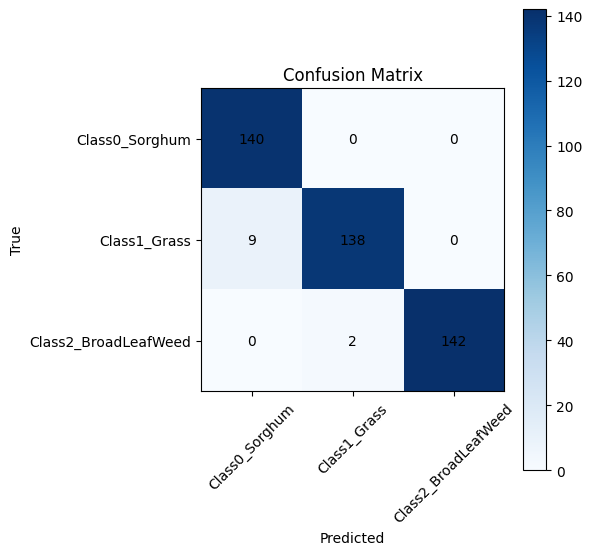

Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.94      1.00      0.97       140
        Class1_Grass       0.99      0.94      0.96       147
Class2_BroadLeafWeed       1.00      0.99      0.99       144

            accuracy                           0.97       431
           macro avg       0.98      0.97      0.97       431
        weighted avg       0.98      0.97      0.97       431



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Convert labels to classes
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_labels = test_generator.classes

# Plot confusion matrix
conf_mat = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# Iterate through each class and print values
for true_class in range(len(class_labels)):
    for pred_class in range(len(class_labels)):
        value = conf_mat[true_class, pred_class]
        plt.text(pred_class, true_class, f'{value}', ha='center', va='center')

plt.tight_layout()
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, y_pred, target_names=class_labels))


14/14 [==============================] - 2s 165ms/step


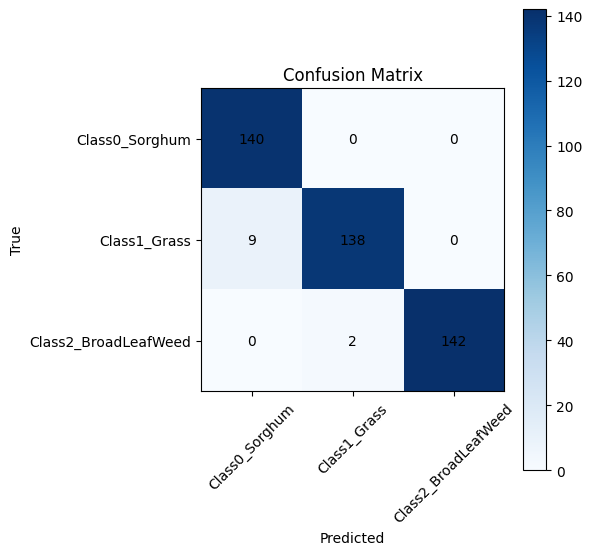

Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.94      1.00      0.97       140
        Class1_Grass       0.99      0.94      0.96       147
Class2_BroadLeafWeed       1.00      0.99      0.99       144

            accuracy                           0.97       431
           macro avg       0.98      0.97      0.97       431
        weighted avg       0.98      0.97      0.97       431



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Convert labels to classes
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_labels = test_generator.classes

# Plot confusion matrix
conf_mat = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')

# Iterate through each class and print values
for true_class in range(len(class_labels)):
    for pred_class in range(len(class_labels)):
        value = conf_mat[true_class, pred_class]
        plt.text(pred_class, true_class, f'{value}', ha='center', va='center')

plt.tight_layout()
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, y_pred, target_names=class_labels))


13/13 [==============================] - 2s 153ms/step


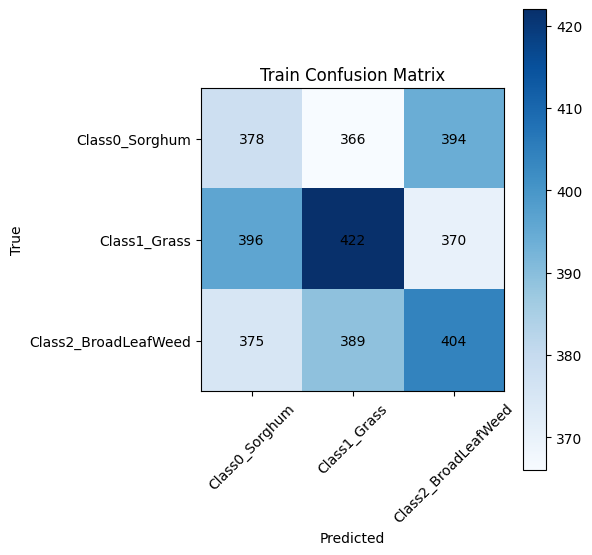

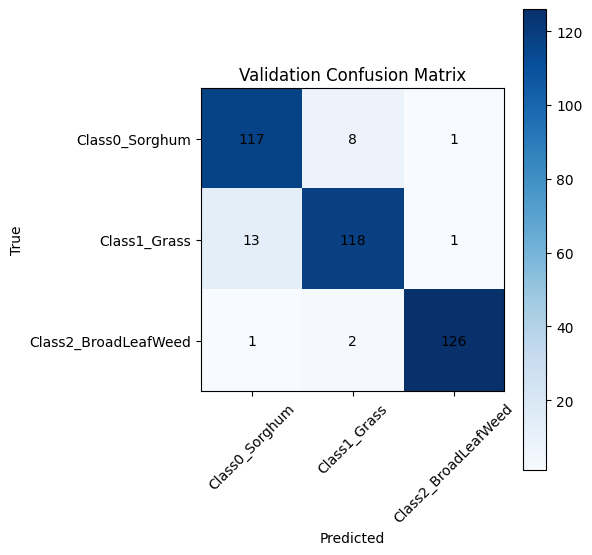

Train Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.33      0.33      0.33      1138
        Class1_Grass       0.36      0.36      0.36      1188
Class2_BroadLeafWeed       0.35      0.35      0.35      1168

            accuracy                           0.34      3494
           macro avg       0.34      0.34      0.34      3494
        weighted avg       0.34      0.34      0.34      3494

Validation Classification Report:
                       precision    recall  f1-score   support

      Class0_Sorghum       0.89      0.93      0.91       126
        Class1_Grass       0.92      0.89      0.91       132
Class2_BroadLeafWeed       0.98      0.98      0.98       129

            accuracy                           0.93       387
           macro avg       0.93      0.93      0.93       387
        weighted avg       0.93      0.93      0.93       387



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(conf_mat, class_labels, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels, rotation=45)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Iterate through each class and print values
    for true_class in range(len(class_labels)):
        for pred_class in range(len(class_labels)):
            value = conf_mat[true_class, pred_class]
            plt.text(pred_class, true_class, f'{value}', ha='center', va='center')

    plt.tight_layout()
    plt.show()

# Predict classes for the train and validation sets separately
Y_train_pred = model.predict(train_generator)
y_train_pred = np.argmax(Y_train_pred, axis=1)

Y_val_pred = model.predict(val_generator)
y_val_pred = np.argmax(Y_val_pred, axis=1)

# Convert labels to classes for train and validation sets
train_class_labels = list(train_generator.class_indices.keys())
val_class_labels = list(val_generator.class_indices.keys())

# Get true labels for train and validation sets
true_train_labels = train_generator.classes
true_val_labels = val_generator.classes

# Calculate confusion matrices for train and validation sets
train_conf_mat = confusion_matrix(true_train_labels, y_train_pred)
val_conf_mat = confusion_matrix(true_val_labels, y_val_pred)

# Plot confusion matrices for train and validation sets
plot_confusion_matrix(train_conf_mat, train_class_labels, title='Train Confusion Matrix')
plot_confusion_matrix(val_conf_mat, val_class_labels, title='Validation Confusion Matrix')

# Display classification report for train and validation sets
print("Train Classification Report:\n", classification_report(true_train_labels, y_train_pred, target_names=train_class_labels))
print("Validation Classification Report:\n", classification_report(true_val_labels, y_val_pred, target_names=val_class_labels))


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Sample usage
# Assuming you have already predicted the labels and have the true labels available

# Define true_labels and y_pred (example values)
true_labels = np.array([0, 1, 2, 0, 1, 2])
y_pred = np.array([0, 1, 2, 1, 0, 2])

# Get the confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)

# Define a function to calculate TP, TN, FP, FN for each class
def calculate_metrics(conf_matrix, class_index):
    TP = conf_matrix[class_index, class_index]
    FN = np.sum(conf_matrix[class_index, :]) - TP
    FP = np.sum(conf_matrix[:, class_index]) - TP
    TN = np.sum(conf_matrix) - TP - FP - FN
    return TP, TN, FP, FN

# Define class labels (assuming classes are indexed from 0 to num_classes-1)
class_labels = ['Sorghum', 'Grass', 'Broadleaf']

# Calculate metrics for each class
metrics = {}
for i, class_label in enumerate(class_labels):
    TP, TN, FP, FN = calculate_metrics(conf_matrix, i)
    metrics[class_label] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

# Print metrics for each class
for class_label, values in metrics.items():
    print(f"Metrics for {class_label}:")
    print("TP:", values['TP'])
    print("TN:", values['TN'])
    print("FP:", values['FP'])
    print("FN:", values['FN'])
    print()

Metrics for Sorghum:
TP: 1
TN: 3
FP: 1
FN: 1

Metrics for Grass:
TP: 1
TN: 3
FP: 1
FN: 1

Metrics for Broadleaf:
TP: 2
TN: 4
FP: 0
FN: 0



In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/Colab Notebooks/model.h5')

# Use the loaded model for prediction or further operations

1/1 [==============================] - 2s 2s/step
sorghum: 0.00%
grass: 99.95%
broadleaf: 0.05%
Predicted Class: grass with Probability: 99.95%


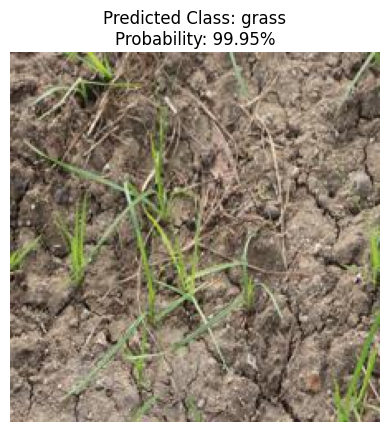

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image for prediction
img_path = '/content/drive/MyDrive/SorghumWeedTnV/Test/Class1_Grass/GrassTest (102).jpeg'  # Provide the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch

# Preprocess the image
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
predicted_classes = np.argmax(predictions, axis=1)
class_probabilities = predictions[0]

# Get the class labels
class_labels = ['sorghum', 'grass', 'broadleaf']   # Assuming train_ds is your training dataset

# Display the image
plt.imshow(img)
plt.axis('off')

# Print the predicted class and its probability
for i in range(len(class_labels)):
    print(f"{class_labels[i]}: {class_probabilities[i]*100:.2f}%")

# Alternatively, you can print only the predicted class and its probability
predicted_class_label = class_labels[predicted_classes[0]]
predicted_class_probability = class_probabilities[predicted_classes[0]] * 100
print(f"Predicted Class: {predicted_class_label} with Probability: {predicted_class_probability:.2f}%")

plt.title(f'Predicted Class: {predicted_class_label}\nProbability: {predicted_class_probability:.2f}%')
plt.show()

1/1 [==============================] - 0s 258ms/step
sorghum: 0.00%
grass: 0.00%
broadleaf: 100.00%
Predicted Class: broadleaf with Probability: 100.00%


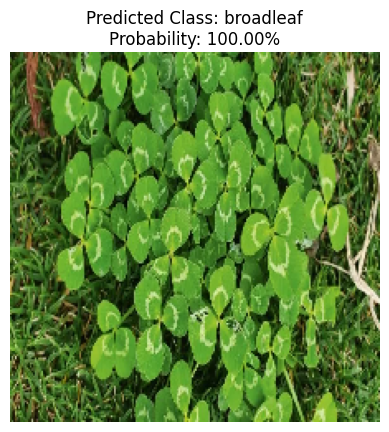

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image for prediction
img_path = '/content/drive/MyDrive/Output pics test/Clover_broadleaf_1200x6284-768x402-1-jpg.webp'  # Provide the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch

# Preprocess the image
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)
predicted_classes = np.argmax(predictions, axis=1)
class_probabilities = predictions[0]

# Get the class labels
class_labels = ['sorghum', 'grass', 'broadleaf']   # Assuming train_ds is your training dataset

# Display the image
plt.imshow(img)
plt.axis('off')

# Print the predicted class and its probability
for i in range(len(class_labels)):
    print(f"{class_labels[i]}: {class_probabilities[i]*100:.2f}%")

# Alternatively, you can print only the predicted class and its probability
predicted_class_label = class_labels[predicted_classes[0]]
predicted_class_probability = class_probabilities[predicted_classes[0]] * 100
print(f"Predicted Class: {predicted_class_label} with Probability: {predicted_class_probability:.2f}%")

plt.title(f'Predicted Class: {predicted_class_label}\nProbability: {predicted_class_probability:.2f}%')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/drive/MyDrive/Colab Notebooks/model.h5')

# Use the loaded model for prediction or further operations

In [24]:
batch_size = 32
image_size = (224, 224)

# Data Preparation with Augmentation using ImageDataGenerator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.1,
)
# Evaluation (Get a new test_ds for true performance estimate)
test_data_dir = '/content/drive/MyDrive/SorghumWeedTnV/Test'  # Provide your test data directory

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

loss, accuracy = model.evaluate(test_generator)
print('Test Accuracy:', accuracy)

Found 431 images belonging to 3 classes.
14/14 [==============================] - 55s 4s/step - loss: 0.1013 - accuracy: 0.9745
Test Accuracy: 0.9744779467582703


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true and y_pred are the true and predicted labels respectively
y_true = []  # True labels
y_pred = []  # Predicted labels

# Iterate over your test dataset and collect true and predicted labels
for images, labels in test_generator:
    predictions = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate TP, TN, FP, FN for each class
num_classes = len(conf_matrix)
class_metrics = {}
for i in range(num_classes):
    TP = conf_matrix[i, i]
    FN = np.sum(conf_matrix[i, :]) - TP
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - TP - FN - FP
    class_metrics[i] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

# Print or use the results as needed
for class_idx, metrics in class_metrics.items():
    print(f"Class {class_idx}:")
    print("True Positives:", metrics['TP'])
    print("True Negatives:", metrics['TN'])
    print("False Positives:", metrics['FP'])
    print("False Negatives:", metrics['FN'])